# Blockchain and Machine Learning for Fraud Detection: Employing Artificial Intelligence in the Banking Sector

## <center> By Vinita Silaparasetty

#### Credits

##### Source: http://lisp.vse.cz/pkdd99/berka.html

##### Prepared by: Petr Berka and Marta Sochorova.


## Data wrangling and Visualization

### Import Libraries

In [3]:
import numpy as np
import scipy
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [4]:
order= pd.read_csv("order.csv")
account= pd.read_csv("account.csv")
transaction= pd.read_csv("transaction.csv")

### Preliminary Glance of Data

In [5]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 6 columns):
order_id      6471 non-null int64
account_id    6471 non-null int64
bank_to       6471 non-null object
account_to    6471 non-null int64
amount        6471 non-null float64
k_symbol      6471 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 303.4+ KB


(6471, 6)


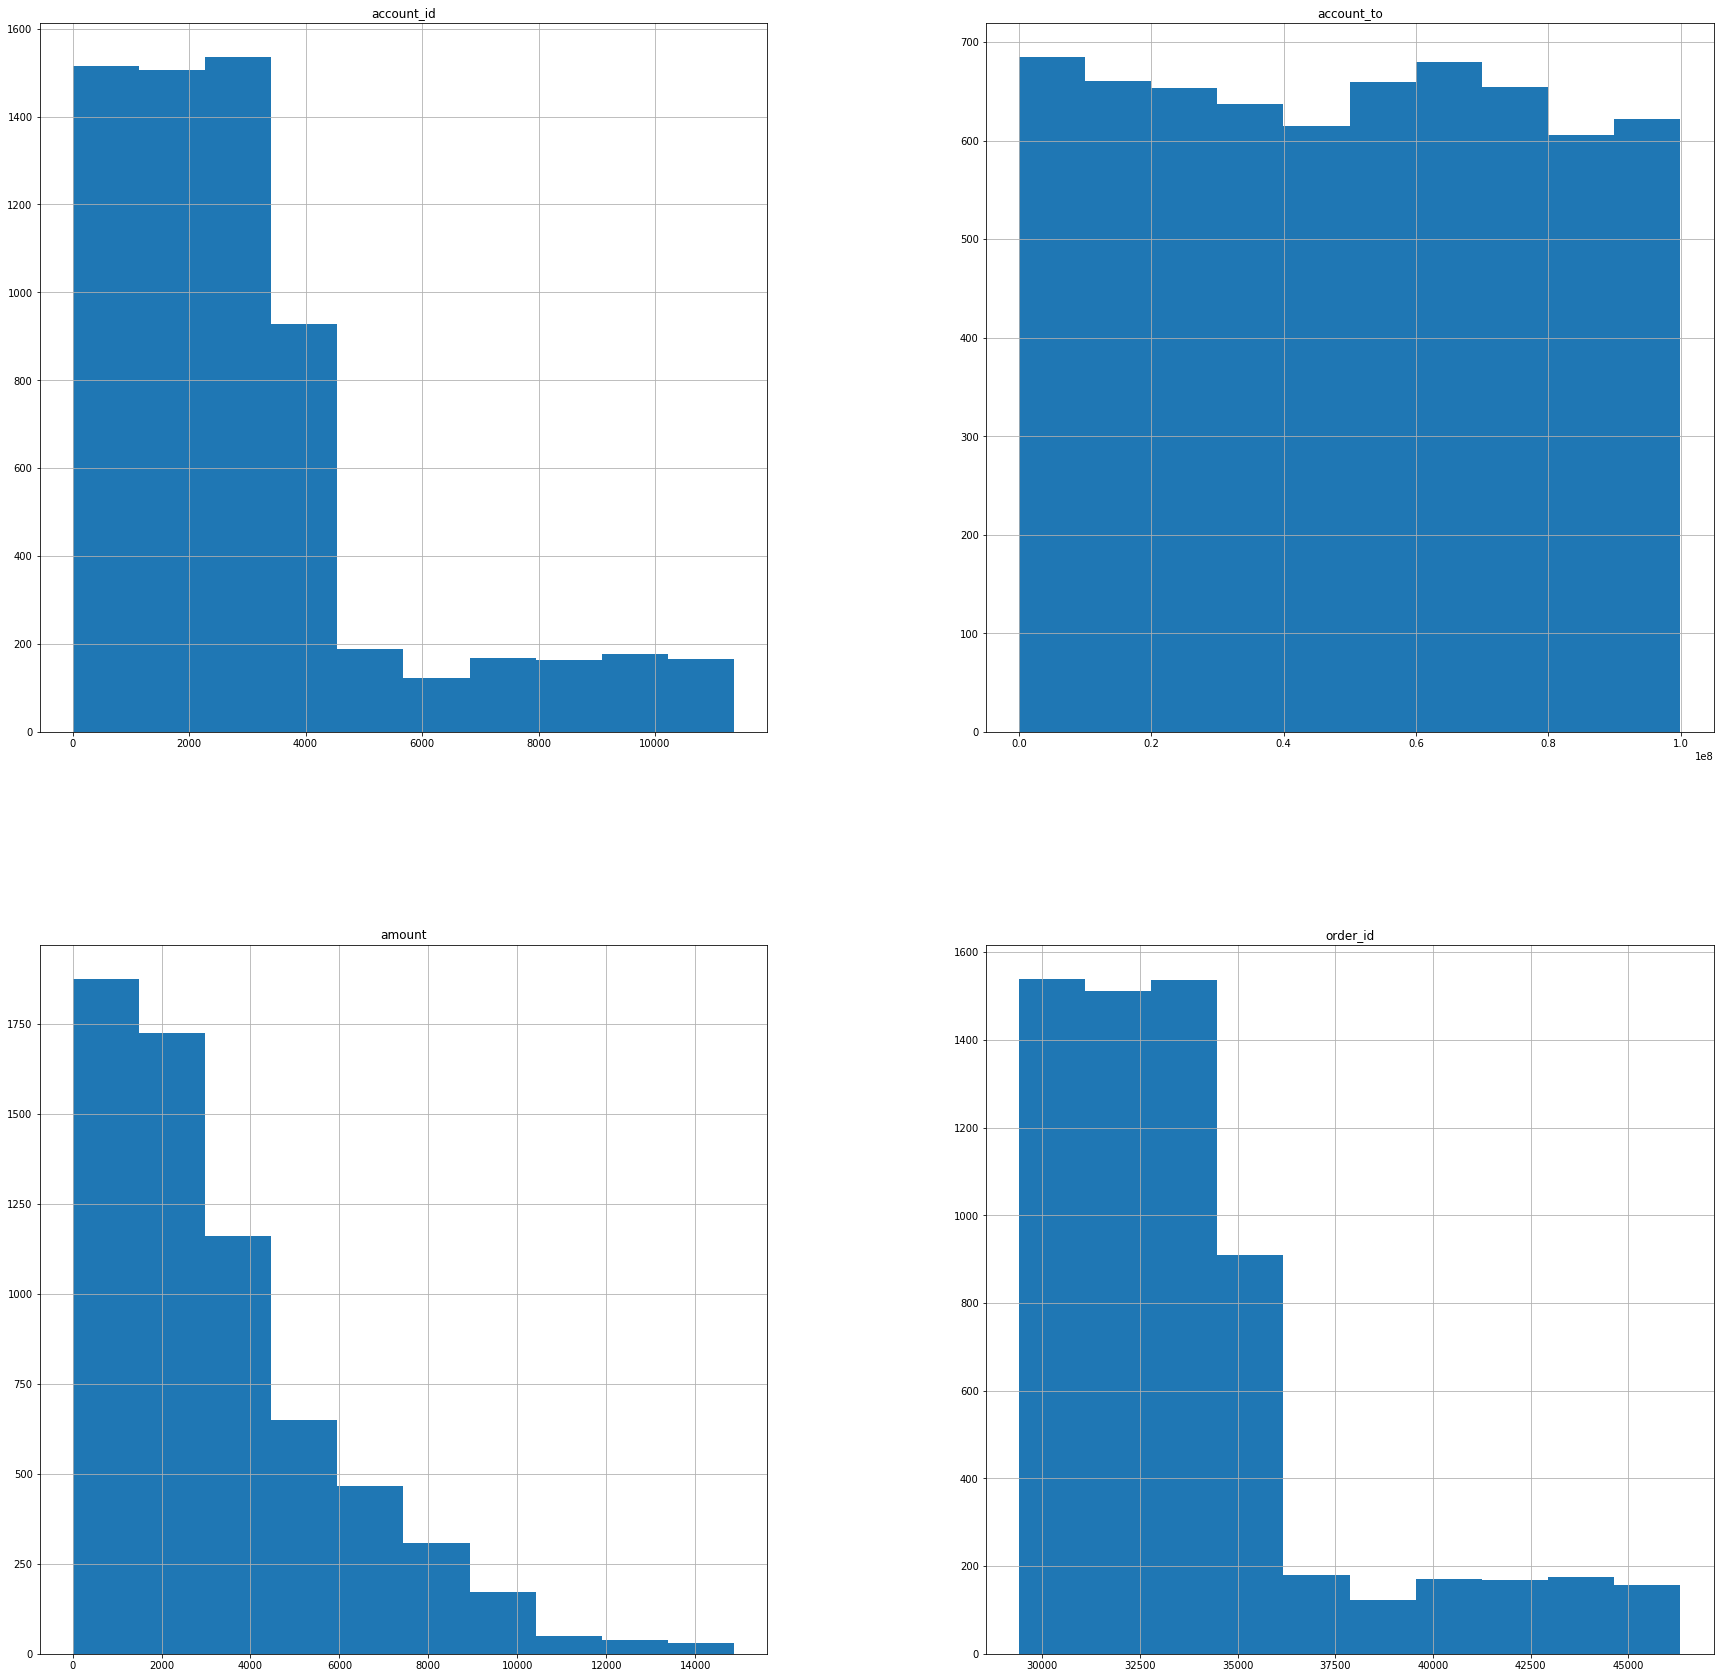

In [6]:
#Visualization
print(order.shape)
order.hist(figsize=(30,30))
plt.show()

In [4]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
Unnamed: 0     4500 non-null int64
account_id     4500 non-null int64
district_id    4500 non-null int64
frequency      4500 non-null object
dtypes: int64(3), object(1)
memory usage: 140.7+ KB


(4500, 4)


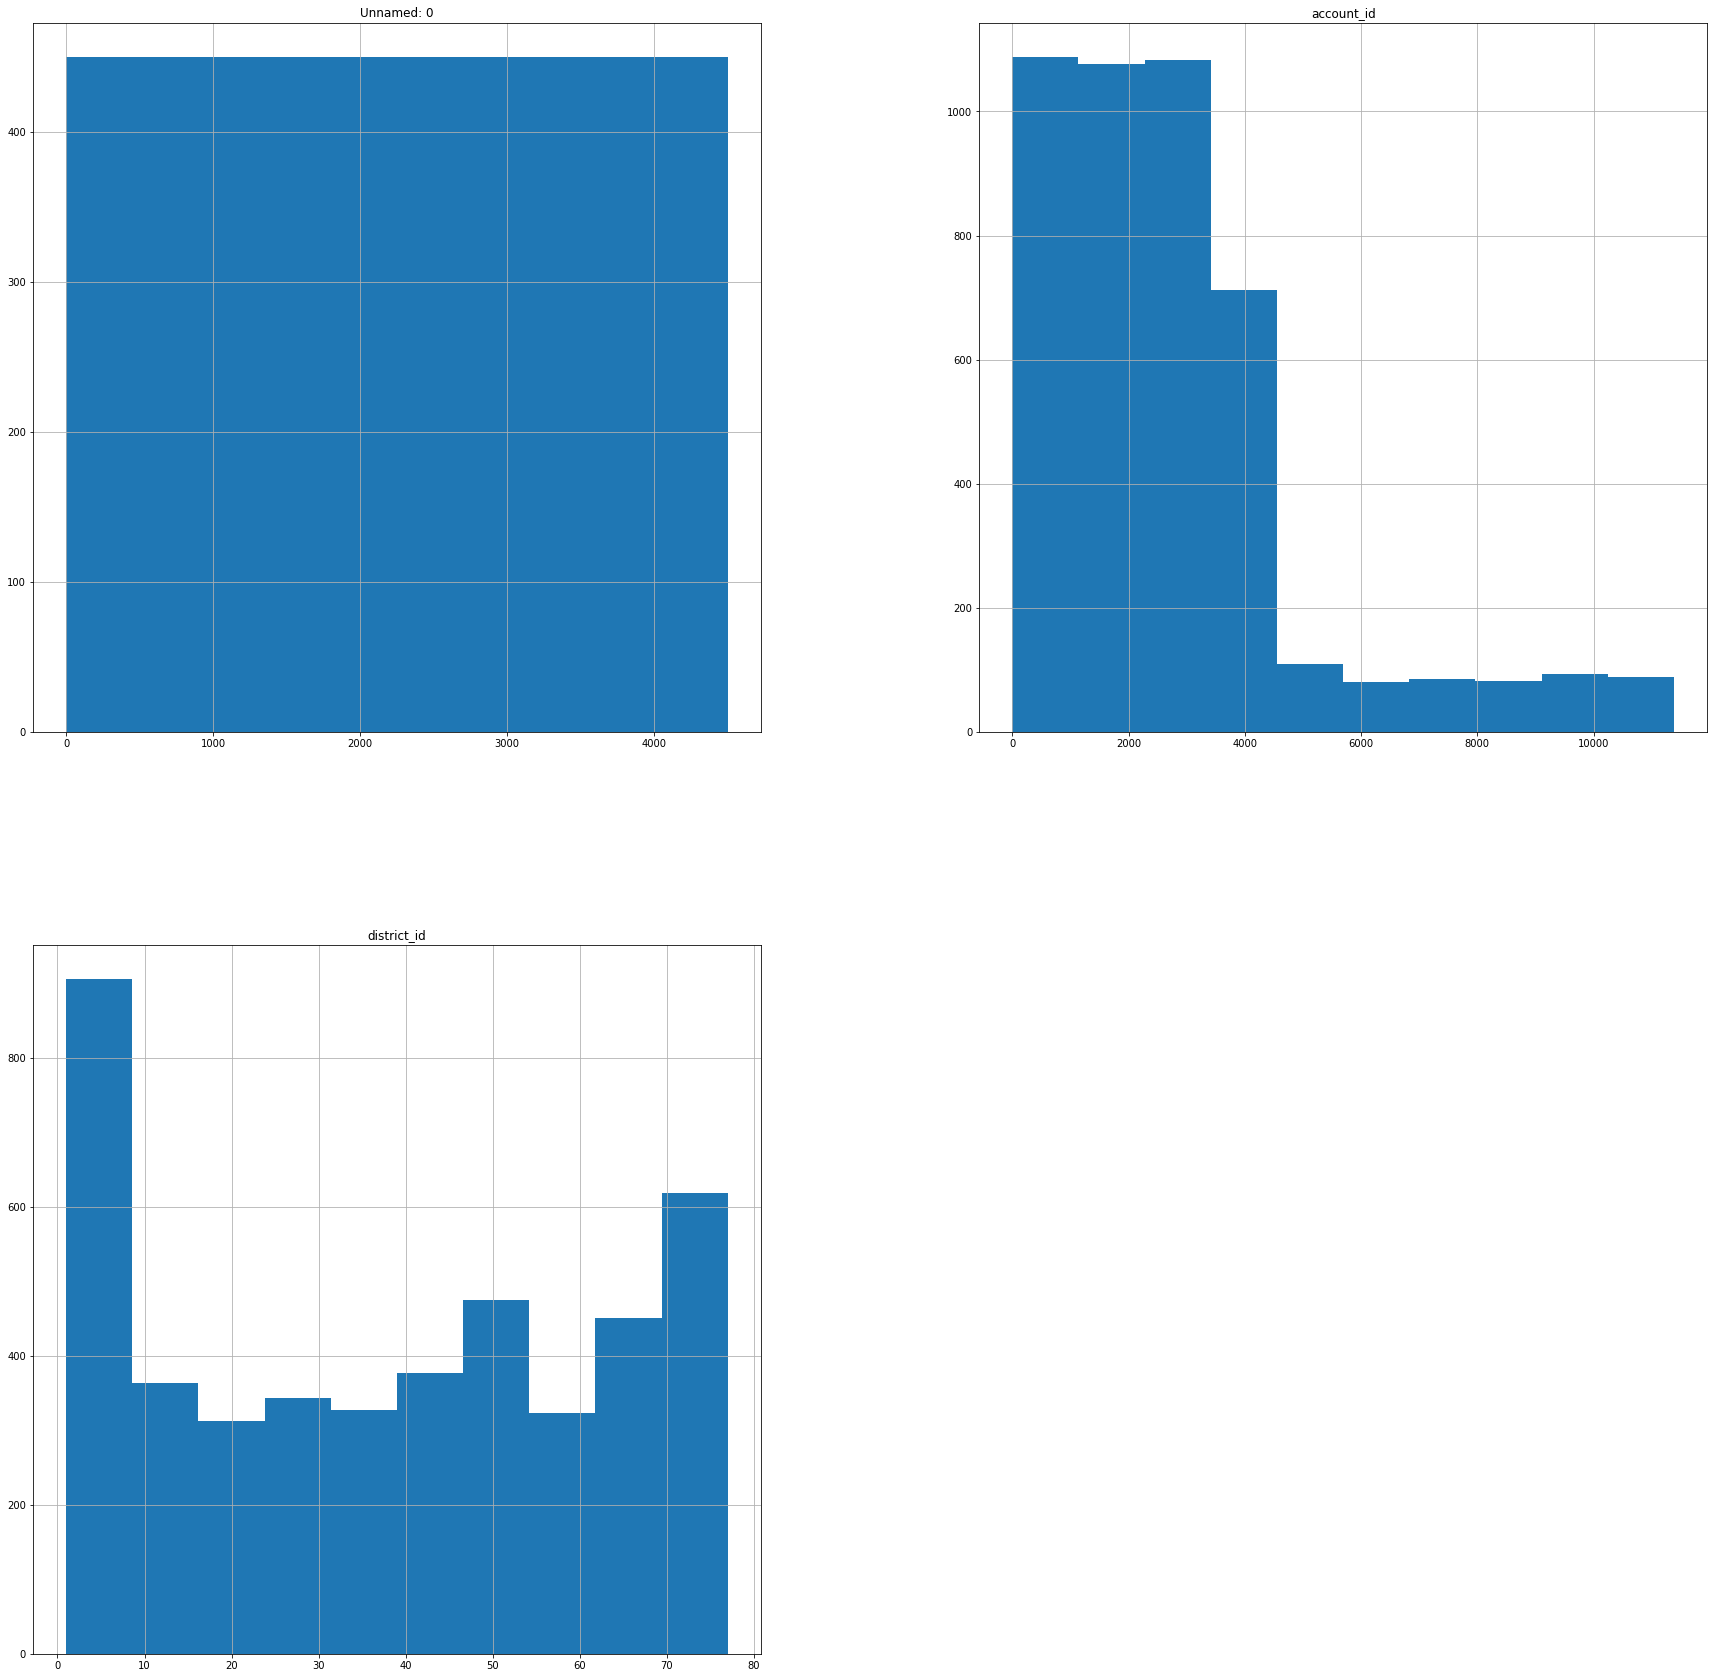

In [7]:
#visualization
print(account.shape)
account.hist(figsize=(30,30))
plt.show()

In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 8 columns):
Unnamed: 0    1056320 non-null int64
account_id    1056320 non-null int64
date          1056320 non-null int64
type          1056320 non-null object
operation     873206 non-null object
amount        1056320 non-null float64
balance       1056320 non-null float64
k_symbol      574439 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 64.5+ MB


(1056320, 8)


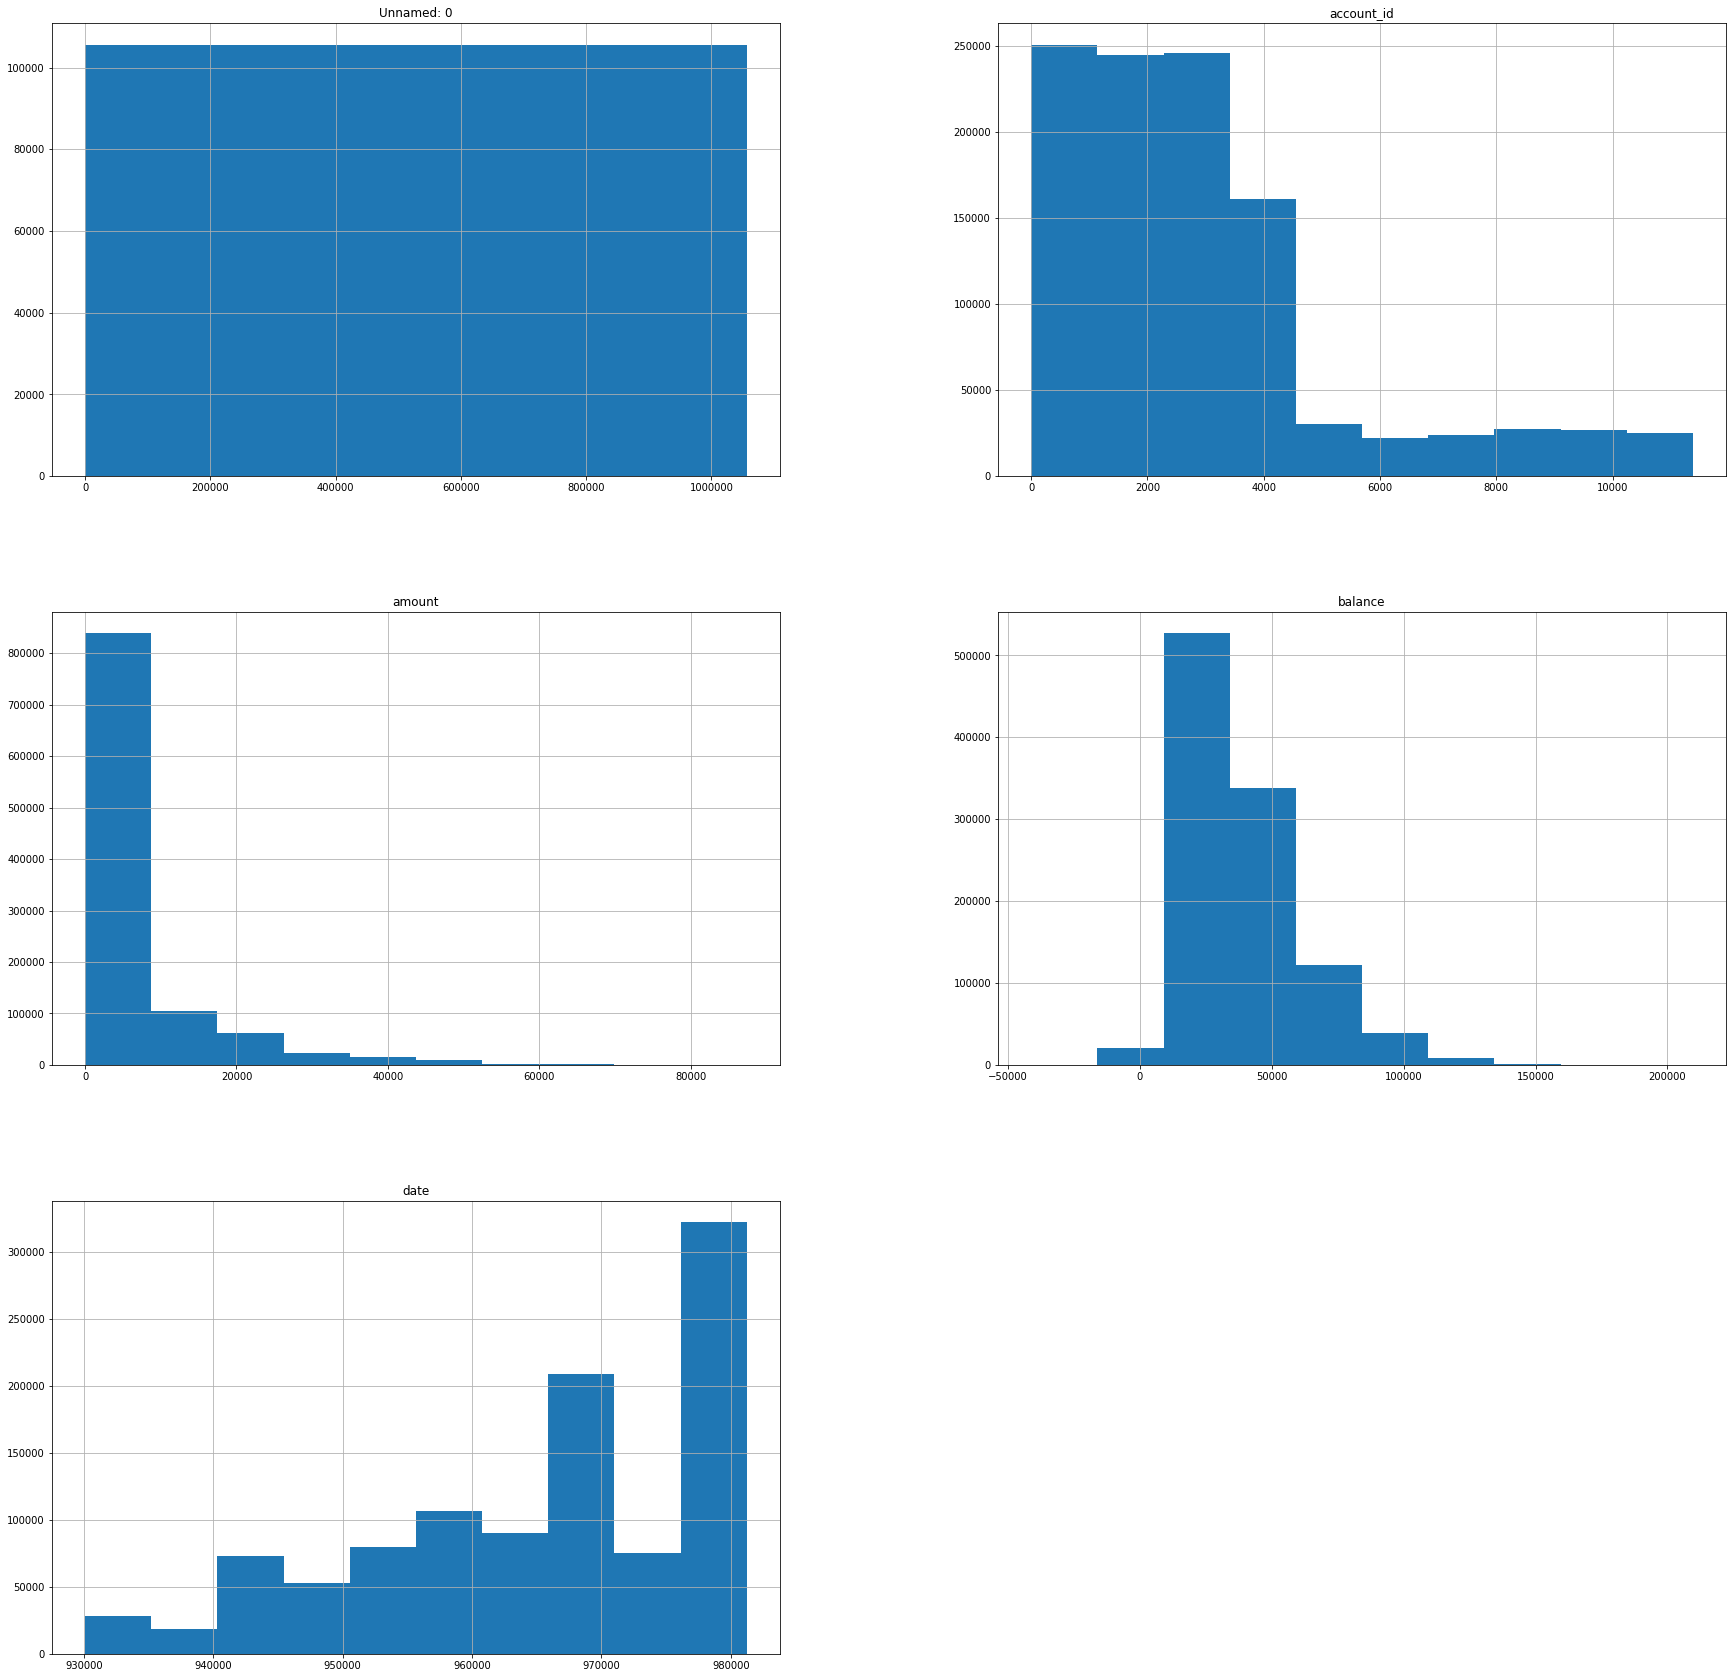

In [8]:
#visualization
print(transaction.shape)
transaction.hist(figsize=(30,30))
plt.show()

#### View Columns

In [6]:
order.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,


In [7]:
account.head()

,Unnamed: 0,account_id,district_id,frequency
0,1,576,55,MONTHLY ISSUANCE
1,2,3818,74,MONTHLY ISSUANCE
2,3,704,55,MONTHLY ISSUANCE
3,4,2378,16,MONTHLY ISSUANCE
4,5,2632,24,MONTHLY ISSUANCE


In [8]:
transaction.head()

,Unnamed: 0,account_id,date,type,operation,amount,balance,k_symbol
0,1,2378,930101,CREDIT,CREDIT IN CASH,700.0,700.0,NaN
1,2,576,930101,CREDIT,CREDIT IN CASH,900.0,900.0,NaN
2,3,704,930101,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN
3,4,3818,930101,CREDIT,CREDIT IN CASH,600.0,600.0,NaN
4,5,1972,930102,CREDIT,CREDIT IN CASH,400.0,400.0,NaN


There are a lot of Nan values in the 'transaction.csv' file. To avoid future errors, I'll remove all the NaN values from each file.

#### Check for Missing Values

In [9]:
#order
def missing_order():
    missing = order.columns[order.isnull().any()].tolist()
    return missing

In [10]:
order[missing_order()].isnull().sum()

Series([], dtype: float64)

In [11]:
#account
def missing_account():
    missing = account.columns[account.isnull().any()].tolist()
    return missing

In [12]:
account[missing_account()].isnull().sum()

Series([], dtype: float64)

In [13]:
#transaction
def missing_transaction():
    missing = transaction.columns[transaction.isnull().any()].tolist()
    return missing

In [14]:
transaction[missing_transaction()].isnull().sum()

operation    183114
k_symbol     481881
dtype: int64

There is one missing value in row 183114 of the 'operation' column another one in row 481881 of the 'k_symbol' column

#### Data Cleaning

#### 1) Handling NaN values by dropping them.

In [15]:
order = order.dropna()

In [16]:
account = account.dropna()

In [17]:
transaction = transaction.dropna()

### Visualize Data

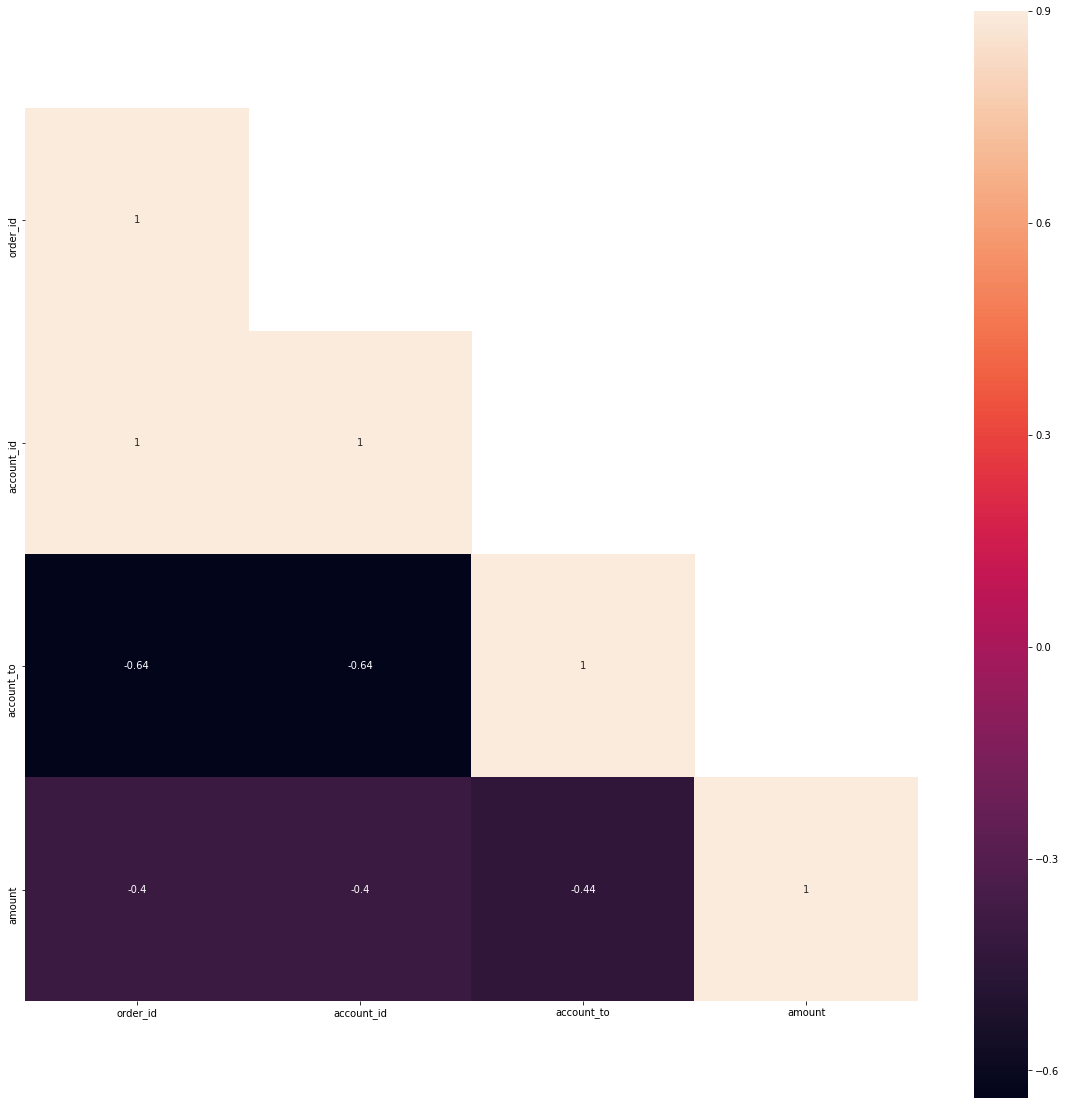

In [22]:
#corelation for order.csv
order = order.corr(method = 'pearson')
mask = np.array(order)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(order, mask = mask, vmax = 0.9, square = True, annot = True)

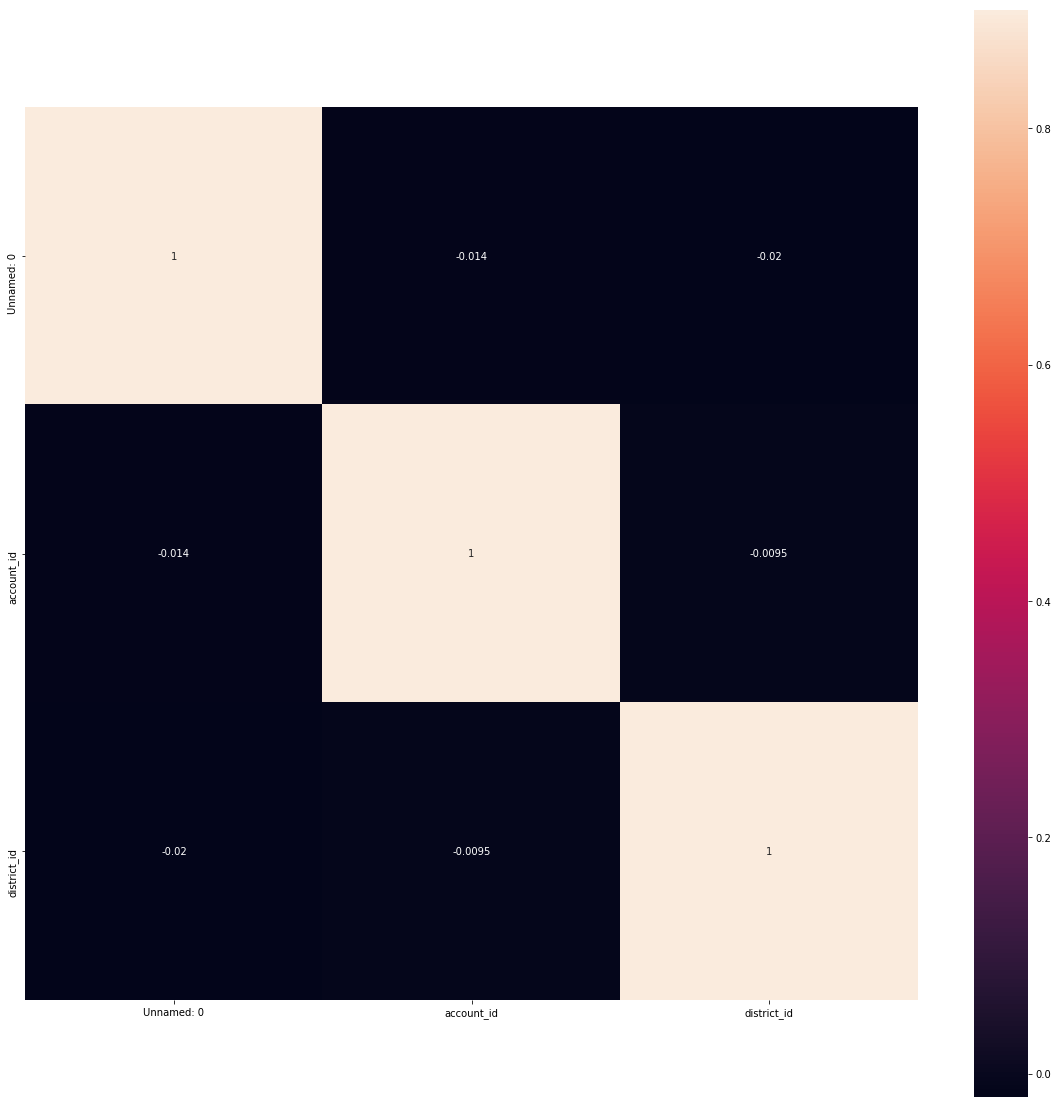

In [23]:
#corelation for account.csv
account = account.corr(method = 'pearson')
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(account, vmax = 0.9, square = True, annot = True)

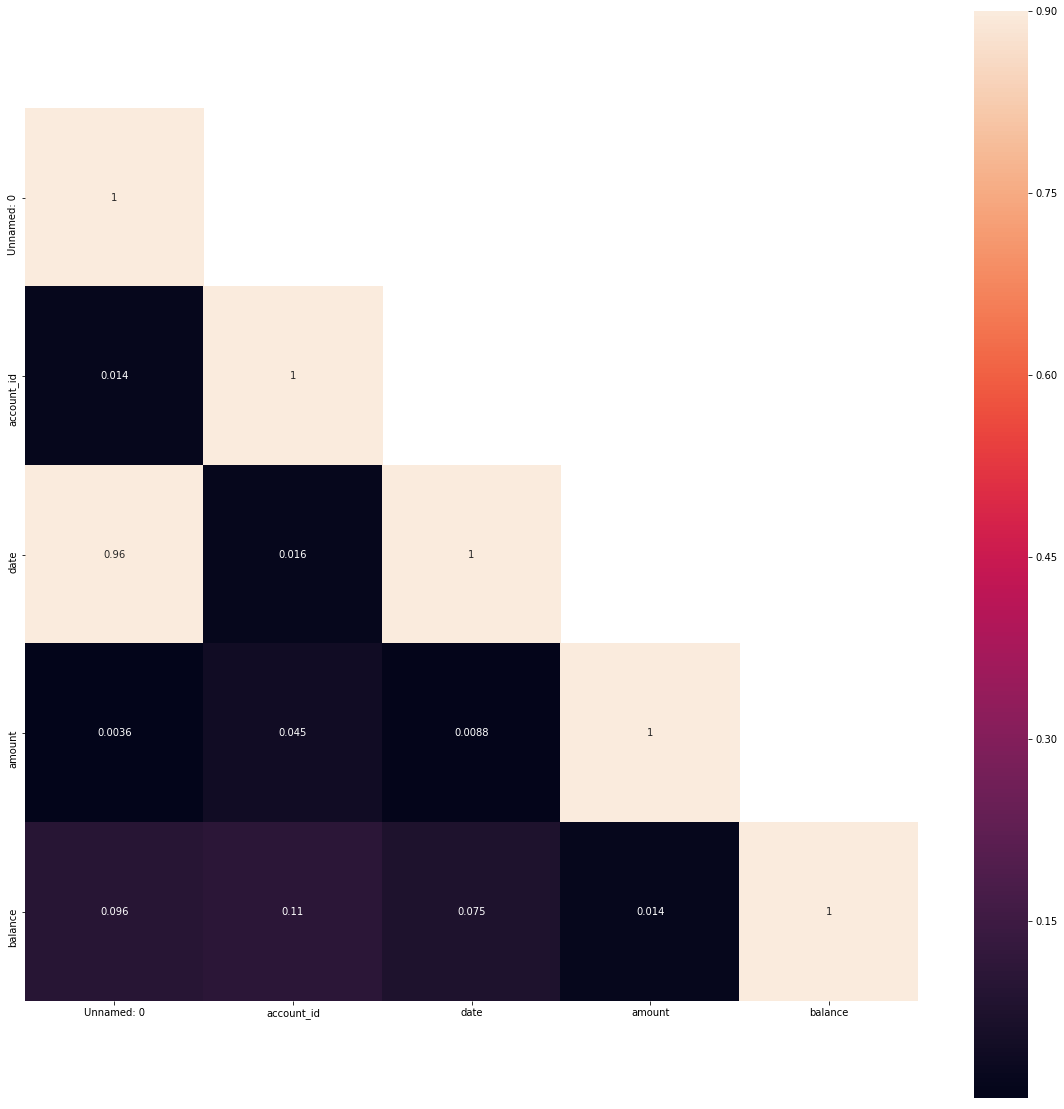

In [24]:
#corelation for transaction.csv
transaction = transaction.corr(method = 'pearson')
mask = np.array(transaction)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(transaction, mask = mask, vmax = 0.9, square = True, annot = True)

##### Note: 
The dataset consisists of several csv files, but I have used only three of the files they serve the pupose of my research. the files I used are:

1) order.csv

2) account.csv

3) transaction.csv
    